In [1]:
from robot.model import Robot
from utils.camera import Camera
from utils.train_data import get_data_train_inike

In [2]:
robot = Robot("COM12")
camera = Camera(0)

Comando enviado: 0:80, 1:161.55, 2:171.62, 3:10
Comando enviado: 0:80, 1:161.55, 2:171.62, 3:10


In [3]:
robot.reset()

Comando enviado: 0:80, 1:161.55, 2:171.62, 3:10


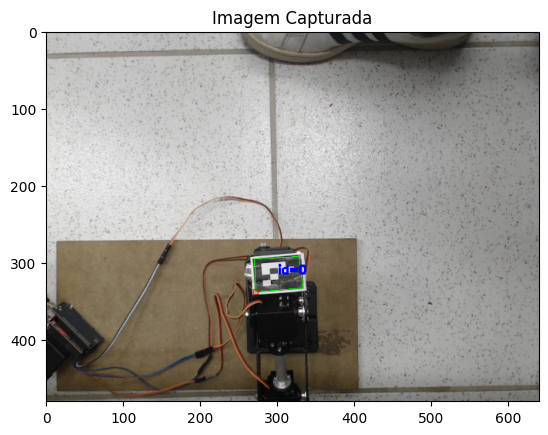

(272,
 338,
 270,
 295,
 328,
 292,
 333,
 333,
 300,
 315,
 72.47068372797375,
 None,
 640,
 480)

In [6]:
camera.get_aruco0_positions(plot_image=True)

Testando posções para:  0.06 0.03


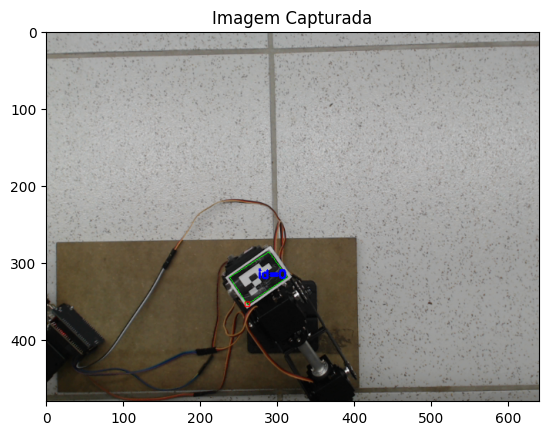

In [7]:
l1 = 0.1 ; l2 =0.124 ; l3 = 0.06
z = 0.12
x_range = (0.05, 0.25)
y_range = (-0.25, 0.25)
step = 10


data = get_data_train_inike(
    robot, camera,
    x_range = x_range,
    y_range= y_range,
    step=step,
    l1=0.1, l2=0.124, l3=0.06,
)

In [ ]:
from itertools import product
from utils.functions import mapping, ikine
import pandas as pd

l1 = 0.1 ; l2 =0.124 ; l3 = 0.06
z = 0.12
x_range = (0.05, 0.25)
y_range = (-0.25, 0.25)
step = 10

tested_positions = list(product(
    range(int(x_range[0]*1000), int(x_range[1]*1000), step),
    range(int(y_range[0]*1000), int(y_range[1]*1000), step)
))

tested_positions = list(filter(
    lambda x: not(abs(x[0]) < 40 or abs(x[1]) < 40), tested_positions
))

data = []

for int_x, int_y in tested_positions:
    x, y = int_x/1000, int_y/1000
    
    try:
        t0, t1, t2, t3, _, _ = mapping(ikine([x, y, z], l1, l2, l3))
    except:
        t0, t1, t2, t3 = [None] * 4

    data.append([x, y, t0, t1, t2, t3])
    
df = pd.DataFrame(data, columns=["x", "y", "t0", "t1", "t2", "t3"])

df.head()
    
    

,x,y,t0,t1,t2,t3
0,0.05,-0.12,12.619865,110.561654,159.649879,49.088225
1,0.05,-0.11,14.443955,116.070862,162.663534,46.592672
2,0.05,-0.10,16.565051,121.544467,165.276087,43.731620
3,0.05,-0.09,19.054604,126.931892,167.479758,40.547867
4,0.05,-0.08,22.005383,132.165903,169.269905,37.104001


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_distribution(df):
    # Filtra os dados para remover linhas onde t0, t1, t2, t3 são nulos ou NaN
    df_clean = df.dropna(subset=["t0", "t1", "t2", "t3"])

    # Filtra os dados para considerar apenas valores entre (-0.25, 0.25) para x e y
    df_filtered = df_clean[(df_clean["x"] >= -0.25) & (df_clean["x"] <= 0.25) &
                           (df_clean["y"] >= -0.25) & (df_clean["y"] <= 0.25)]

    # Classifica os pontos como vermelho ou verde
    df_filtered["color"] = df_filtered.apply(
        lambda row: 'red' if (row[['t0', 't1', 't2', 't3']] < 0).sum() >= 2 or (row[['t0', 't1', 't2', 't3']] > 180).sum() >= 2 else 'green',
        axis=1)

    # Plota os pontos no gráfico
    plt.figure(figsize=(8, 8))
    plt.scatter(df_filtered["x"], df_filtered["y"], c=df_filtered["color"], label="Pontos")
    plt.title("Distribuição de Pontos em Função de x e y")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()


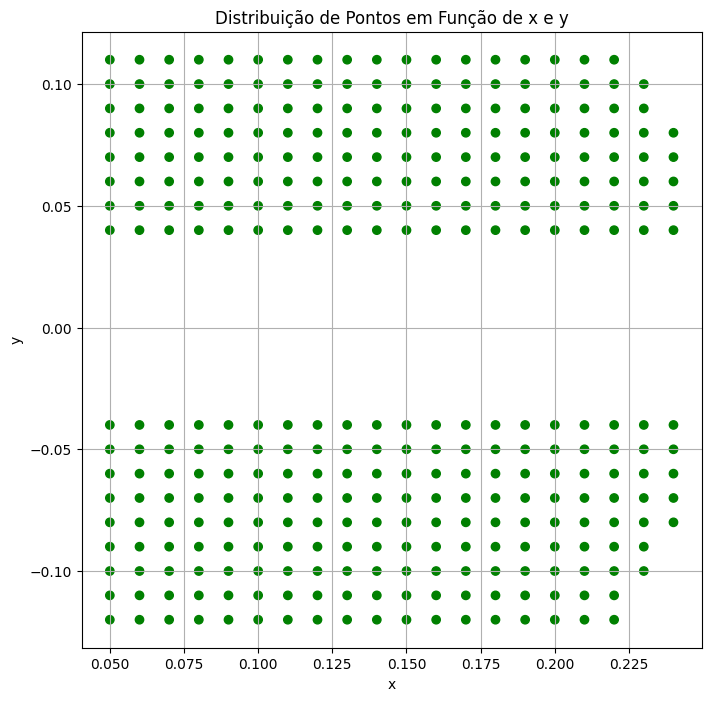

In [ ]:
plot_distribution(df)